<a href="https://colab.research.google.com/github/santiagomartin4424/Deep-Renewable-Energy-Analysis-and-Forecasting/blob/main/definitive_productions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREPROCESSING OF THE THREE DATASETS INTO ONE**


In [ ]:

# RUN --------- A GREAT FORMAT TO PRINT THE PLOTS -------------
import matplotlib.pyplot as plt

# Configuración global de fuentes
plt.rcParams.update({
    'font.size': 12,          # Tamaño base
    'axes.titlesize': 18,     # Título
    'axes.labelsize': 16,     # Etiquetas X e Y
    'xtick.labelsize': 12,    # Números del eje X
    'ytick.labelsize': 12,    # Números del eje Y
    'legend.fontsize': 13,    # Leyenda
    'figure.titlesize': 20    # Título de la figura
})

***3. Weather FORECAST***

In [ ]:
import pandas as pd
import io

#address = "/content/drive/MyDrive/ENSEIRBMATMECA/FOUILLE/definitive/_3weatherforecast.csv"
address = "https://raw.githubusercontent.com/santiagomartin4424/Deep-Renewable-Energy-Analysis-and-Forecasting/refs/heads/main/data/_3weatherforecast.csv"


# 1. We load with sep=None and engine='python' so that Pandas can detect if it is a comma, semicolon or tab
df_meteo = pd.read_csv(address, sep=None, engine='python')

# 2. Radical cleanup of column names. We remove spaces, line breaks...
df_meteo.columns = [col.strip().replace('"', '') for col in df_meteo.columns]

# 3. Mapping dictionary (we use 'time' which is how it comes in the CSV)
col_map = {
    'time': 'datetime',
    'temperature_2m (°C)': 'temperature_2m',
    'relative_humidity_2m (%)': 'humidity_2m',
    'cloud_cover (%)': 'cloud_cover_total',
    'visibility (m)': 'visibility_m',
    'is_day ()': 'is_day',
    'rain (mm)': 'rain_mm'
}

# We only rename existing cols to avoid mistakes
df_meteo.rename(columns=col_map, inplace=True)

# 4. Try to cast column to datetime
if 'datetime' in df_meteo.columns:
    df_meteo['datetime'] = pd.to_datetime(df_meteo['datetime'], errors='coerce')

# 5. Cast the others to numeric
for col in df_meteo.columns:
    if col != 'datetime':
        df_meteo[col] = pd.to_numeric(df_meteo[col], errors='coerce')

# 6. Real verification
print("Encountered cols:", df_meteo.columns.tolist())
print("\nFirst rows:")
#print(df_meteo.head())

df_meteo['datetime'] = df_meteo['datetime'] - pd.Timedelta(days=2)
print(df_meteo.head())



Encountered cols: ['datetime', 'temperature_2m', 'humidity_2m', 'cloud_cover_total', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'visibility_m', 'vapour_pressure_deficit (kPa)', 'is_day', 'shortwave_radiation (W/m²)', 'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)', 'global_tilted_irradiance (W/m²)', 'dew_point_2m (°C)', 'surface_pressure (hPa)', 'sunshine_duration (s)', 'total_column_integrated_water_vapour (kg/m²)', 'rain_mm', 'showers (mm)']

First rows:
             datetime  temperature_2m  humidity_2m  cloud_cover_total  \
0 2022-01-28 00:00:00             3.5           90                  0   
1 2022-01-28 01:00:00             3.3           92                  5   
2 2022-01-28 02:00:00             3.2           93                  5   
3 2022-01-28 03:00:00             3.0           93                  0   
4 2022-01-28 04:00:00             2.9           94                  0   

   cloud_cover_low (%)  cloud_cover_mid (%)  visibility_m  \
0                    0

***2. Solar MEASURES*** and merge with the previous dataset

In [ ]:
import pandas as pd
import io

# 1. Load the second dataset (adjust the path to your file)
# We use skiprows=42 because the names are on line 43
#address_solar = "/content/drive/MyDrive/ENSEIRBMATMECA/FOUILLE/definitive/_2measures.csv"
address_solar = "https://raw.githubusercontent.com/santiagomartin4424/Deep-Renewable-Energy-Analysis-and-Forecasting/refs/heads/main/data/_2measures.csv"

df_solar = pd.read_csv(address_solar, sep=";", skiprows=42)

# 2. Cols name cleaning
df_solar.columns = [col.strip().replace('# ', '').replace(' ', '_').lower() for col in df_solar.columns]

# 3. Limpiar la columna de tiempo
# El formato es "2022-01-30T00:00:00.0/2022-01-30T01:00:00.0"
# Para el merge, nos quedamos solo con la fecha de inicio
df_solar['datetime'] = df_solar['observation_period'].str.split('/').str[0]
df_solar['datetime'] = pd.to_datetime(df_solar['datetime'])

# Ya no necesitamos la columna original de periodo
df_solar.drop(columns=['observation_period'], inplace=True)
#print(df_solar.head())

# 4. EL MERGE FINAL
# 'inner' solo deja las filas que coinciden en ambos. 'left' mantiene todo lo de meteo.
df_final = pd.merge(df_solar, df_meteo, on='datetime', how='inner')

print("Combined Dataset:")
print(df_final.head())
print("\nTotal cols:", df_final.columns.tolist())


import re
def final_clean(name):
    name = re.sub(r'\(.*?\)', '', name) # Quita paréntesis
    name = name.replace('°C', '').strip()
    return re.sub(r'[\s\W]+', '_', name).lower().strip('_')

df_final.columns = [final_clean(c) for c in df_final.columns]


Combined Dataset:
   toa  clear_sky_ghi  clear_sky_bhi  clear_sky_dhi  clear_sky_bni  ghi  bhi  \
0  0.0            0.0            0.0            0.0            0.0  0.0  0.0   
1  0.0            0.0            0.0            0.0            0.0  0.0  0.0   
2  0.0            0.0            0.0            0.0            0.0  0.0  0.0   
3  0.0            0.0            0.0            0.0            0.0  0.0  0.0   
4  0.0            0.0            0.0            0.0            0.0  0.0  0.0   

   dhi  bni reliability,  ... shortwave_radiation (W/m²)  \
0  0.0  0.0      1.0000,  ...                        0.0   
1  0.0  0.0      1.0000,  ...                        0.0   
2  0.0  0.0      1.0000,  ...                        0.0   
3  0.0  0.0      1.0000,  ...                        0.0   
4  0.0  0.0      1.0000,  ...                        0.0   

   diffuse_radiation (W/m²)  direct_normal_irradiance (W/m²)  \
0                       0.0                              0.0   
1           

***1. PRODUCTION DATASET*** and final dataset created (with the 3 csv)



In [ ]:
import pandas as pd

# 1. Cargar el dataset regional (ajusta el separador si es tabulación '\t' o ';')
#address_reg = "/content/drive/MyDrive/ENSEIRBMATMECA/FOUILLE/definitive/_1prod.csv"
address_reg = "https://raw.githubusercontent.com/santiagomartin4424/Deep-Renewable-Energy-Analysis-and-Forecasting/refs/heads/main/data/_1prod.csv"

df_reg = pd.read_csv(address_reg, sep=None, engine='python')

# 2. Localizar las columnas correctas sin importar cómo se llamen exactamente
# Buscamos la columna que contenga "Date" y "Heure"
col_tiempo = [c for c in df_reg.columns if 'Date' in c and 'Heure' in c][0]
# Buscamos la columna que contenga "Solaire"
col_solaire = [c for c in df_reg.columns if 'Solaire (MW)' in c and '(MW)' in c][0]

print(f"Time col detected: {col_tiempo}")
print(f"Solar production col detected: {col_solaire}")

# 3. Quedarnos solo con lo necesario y renombrar
df_reg = df_reg[[col_tiempo, col_solaire]].copy()
df_reg.columns = ['datetime', 'solaire_mw']

# 4. Convertir a datetime y forzar UTC para que coincida con los otros datasets
df_reg['datetime'] = pd.to_datetime(df_reg['datetime'], utc=True, errors='coerce')

# 5. RESAMPLE a 1 hora (promediando los bloques de 30 min)
# Esto es CRÍTICO para el merge posterior
df_reg = df_reg.set_index('datetime').resample('1h').mean().reset_index()

#print(df_reg[['datetime', 'solaire_mw']].head())


# 6. MERGE con el dataframe "tocho" (el que ya tiene clima e irradiancia)
# Asegúrate de que df_final también sea UTC
df_final['datetime'] = pd.to_datetime(df_final['datetime'], utc=True)

df_ultra_final = pd.merge(df_reg, df_final, on='datetime', how='inner')

print("\n¡Successful merge!")
print(f"Current nº of rows in the dataset: {len(df_ultra_final)}")
#print(df_ultra_final[['datetime', 'solaire_mw']].head())
print(df_ultra_final.head())




Time col detected: Date - Heure
Solar production col detected: Solaire (MW)

¡Successful merge!
Current nº of rows in the dataset: 25607
                   datetime  solaire_mw  toa  clear_sky_ghi  clear_sky_bhi  \
0 2022-01-30 00:00:00+00:00         0.0  0.0            0.0            0.0   
1 2022-01-30 01:00:00+00:00         0.5  0.0            0.0            0.0   
2 2022-01-30 02:00:00+00:00         0.0  0.0            0.0            0.0   
3 2022-01-30 03:00:00+00:00         0.0  0.0            0.0            0.0   
4 2022-01-30 04:00:00+00:00         0.0  0.0            0.0            0.0   

   clear_sky_dhi  clear_sky_bni  ghi  bhi  dhi  ...  shortwave_radiation  \
0            0.0            0.0  0.0  0.0  0.0  ...                  0.0   
1            0.0            0.0  0.0  0.0  0.0  ...                  0.0   
2            0.0            0.0  0.0  0.0  0.0  ...                  0.0   
3            0.0            0.0  0.0  0.0  0.0  ...                  0.0   
4            0

--------------------------------------------------------------
--------------------------------------------------------------
#**TRAINING AND TEST SPLITTING (the test starts given a specific date)**

In [ ]:
# ==========================================
# CONFIGURATION / PARAMETERS
# ==========================================
FECHA_CORTE = "2024-01-25"  # Day on which the test starts
DIAS_TEST = 2               # How many days do you wanna predict ?
TARGET_COL = 'solaire_mw'   # The target variables
# ==========================================


# --- 1. COLS CLEANING ---  Limpiar el error de la coma en 'reliability'
df_ultra_final['reliability'] = df_ultra_final['reliability'].astype(str).str.replace(',', '').astype(float)

# Crear una columna con la producción de la hora anterior
#df_ultra_final['prod_anterior'] = df_ultra_final['solaire_mw'].shift(1)
# (Recuerda re-entrenar el modelo incluyendo esta columna en las features)

# --- 2. ORDER AND FILL ---
df_ultra_final = df_ultra_final.sort_values('datetime')
df_ultra_final = df_ultra_final.dropna(subset=['solaire_mw']) # Eliminar filas donde el target (es decir, solaire_mw) sea NaN
df_ultra_final = df_ultra_final.ffill().fillna(0) # Rellenamos X con el valor anterior, o con 0

print(f"NaNs in target: {df_ultra_final['solaire_mw'].isna().sum()}")
print(f"Filas restantes tras limpieza: {len(df_ultra_final)}\n")


# --- 3. DEFINITION OF TIMES ---
dia_inicio = pd.to_datetime(FECHA_CORTE).tz_localize('UTC')
dia_fin = dia_inicio + pd.Timedelta(days=DIAS_TEST) #dentro de 5 días en el futuro, para test.


# --- 4. SPLIT (Con sus copias independientes) ---
train_df = df_ultra_final[df_ultra_final['datetime'] < dia_inicio].copy()

test_df = df_ultra_final[(df_ultra_final['datetime'] >= dia_inicio) &
                         (df_ultra_final['datetime'] < dia_fin)].copy()

# --- 5. VERIFICACIÓN ---
print(f"Total rows in test: {len(test_df)} (deberían ser unas 120 si es horario)")
print(f"Rows train: {len(train_df)}")

print(f"Training: until {train_df['datetime'].max()}")
print(f"Test (5 days): from {test_df['datetime'].min()} until {test_df['datetime'].max()}")

NaNs in target: 0
Filas restantes tras limpieza: 25604

Total rows in test: 48 (deberían ser unas 120 si es horario)
Rows train: 17398
Training: until 2024-01-24 23:00:00+00:00
Test (5 days): from 2024-01-25 00:00:00+00:00 until 2024-01-26 23:00:00+00:00


#**MODEL BUILDING**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import xgboost as xgb

# --- 1. PREPARACIÓN DE MATRICES ---
target = 'solaire_mw'
features = [col for col in df_ultra_final.columns if col not in [target, 'datetime']]

X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

# --- 2. CONFIGURACIÓN Y ENTRENAMIENTO ---
# Lo guardamos en 'model_rf' para usarlo luego
model_rf_bad = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    n_jobs=-1,
    random_state=42
)

model_rf = RandomForestRegressor(
    n_estimators=300,        # More trees.
    max_depth=20,            # More complex rules.
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)


# --- "HIGH-PERFORMANCE" CONFIGURATION OF XGBOOST ---
model_xgb_bad = xgb.XGBRegressor(
    n_estimators=500,           # High number of iterations to refine the error
    learning_rate=0.05,         # Slow but steady step to avoid overshooting
    max_depth=8,                # Deep enough to capture complex feature interactions
    subsample=0.8,              # Trains on 80% of data per iteration (prevents memorization)
    colsample_bytree=0.8,       # Uses only 80% of features per tree
    gamma=1,                    # Penalizes trees that don't add enough value (reduces noise)
    reg_alpha=0.1,              # L1 regularization (helps discard redundant variables)
    tree_method='hist',         # Histogram-based training for ultra-fast performance
    random_state=42,
    objective='reg:squarederror'
)

# --- "ROBUST & BALANCED" CONFIGURATION, Constraints applied ---
model_xgb = xgb.XGBRegressor(
    n_estimators=1000,           # More trees but with smaller impact per tree
    learning_rate=0.03,          # Smaller steps for finer convergence
    max_depth=6,                 # Lower depth to reduce overfitting/memorization
    # --- MODEL CONSTRAINTS (Regularization) ---
    colsample_bytree=0.5,        # EACH TREE can only see 50% of the features.
                                 # This forces the model to learn from secondary variables!
    subsample=0.7,               # Uses only 70% of rows per iteration for diversity
    reg_alpha=10,                # Strong L1 regularization (filters out weak variables)
    reg_lambda=1,                # L2 regularization (prevents feature weights from exploding)
    # ------------------------------------------
    random_state=42
)


print("Training RandomForestRegressor...")
model_rf.fit(X_train, y_train)
print("RandomForestRegressor ready.")

print("Training XGBoost...")
model_xgb.fit(X_train, y_train)
print("XGBoost ready.")



Training RandomForestRegressor...
RandomForestRegressor ready.
Training XGBoost...
XGBoost ready.


# **METRICS AND PLOTS**

Metrics in the test period of (2 days):
  R2 Score: 0.9754
  MAE:      41.96 MW
  nMAE:      1.95%



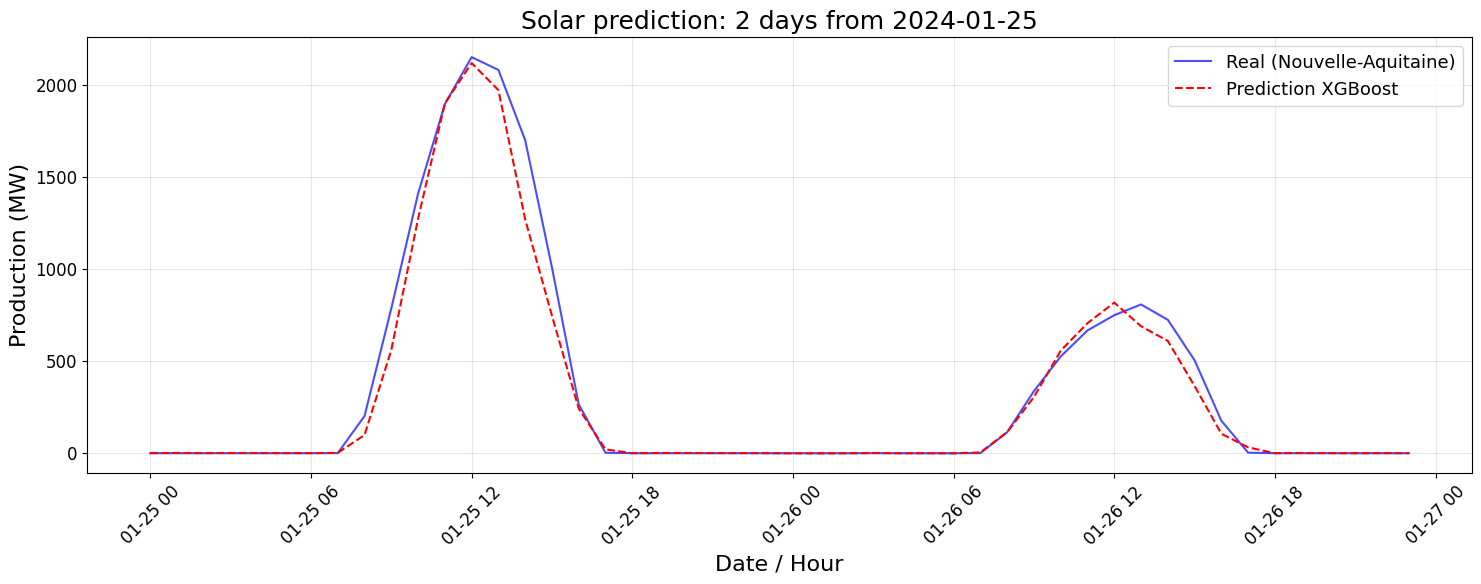

In [ ]:
# --- 1. GENERAR PREDICCIÓN ---
y_pred = model_xgb.predict(X_test)

# --- 2. EVALUACIÓN ---
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Metrics in the test period of ({DIAS_TEST} days):")
print(f"  R2 Score: {r2:.4f}")
print(f"  MAE:      {mae:.2f} MW")
print(f"  nMAE:      {mae / y_test.max() * 100:.2f}%\n")
#'nMAE (%)': round((mae_temp / y_temp_real.max()) * 100, 2) if y_temp_real.max() > 0 else 0


# --- 3. PLOT DINÁMICO ---
plt.figure(figsize=(15, 6))

# Usamos todos los datos disponibles en test_df (que ya limitamos con DIAS_TEST)
plt.plot(test_df['datetime'], y_test, label='Real (Nouvelle-Aquitaine)', color='blue', alpha=0.7)
plt.plot(test_df['datetime'], y_pred, label='Prediction XGBoost', color='red', linestyle='--')

# Título dinámico que usa tus variables
plt.title(f"Solar prediction: {DIAS_TEST} days from {FECHA_CORTE}")
plt.ylabel("Production (MW)")
plt.xlabel("Date / Hour")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout() # Para que no se corten las etiquetas de fecha
plt.show()

Results for 2 days of test:
Metrics Random Forest  : R2=  0.9634 | MAE=   53.84 MW | nMAE=  2.50%
Metrics XGBoost        : R2=  0.9754 | MAE=   41.96 MW | nMAE=  1.95%
Metrics Persistence    : R2= -0.5913 | MAE=  383.82 MW | nMAE= 17.82%


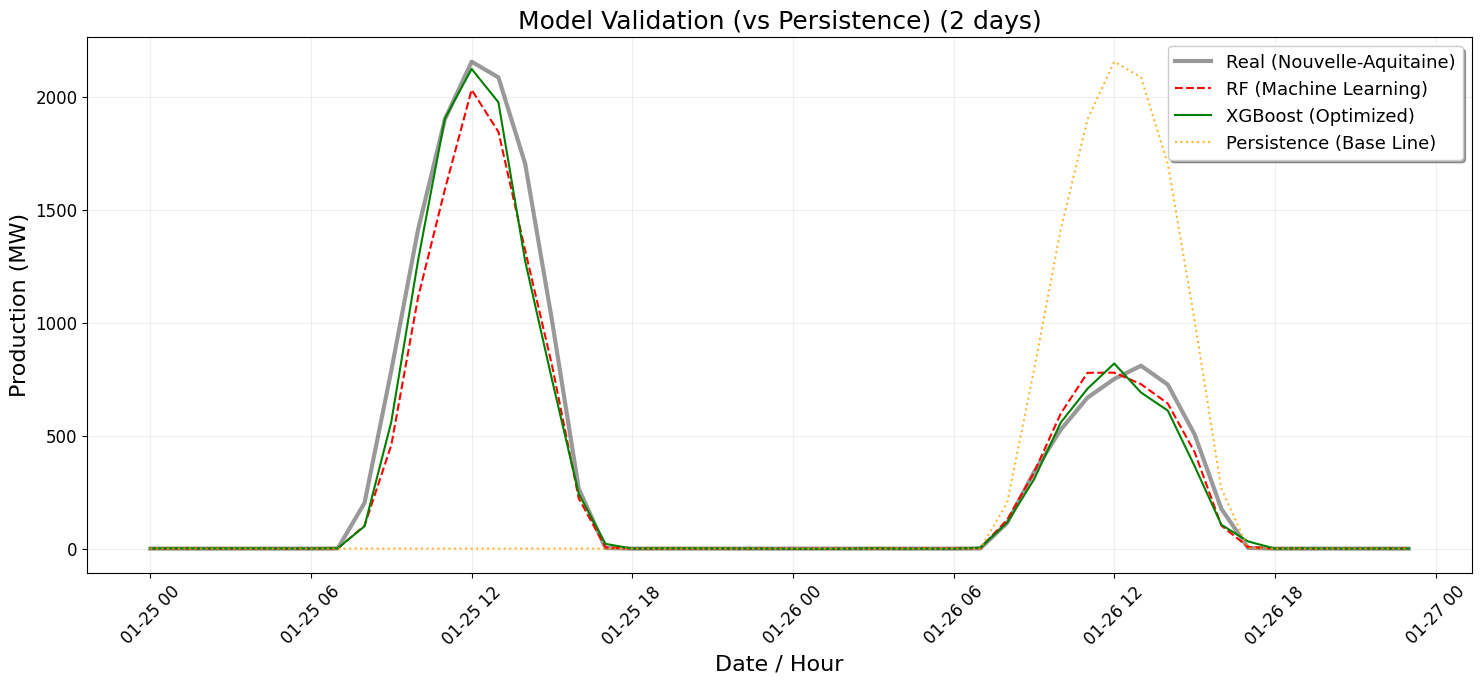

In [ ]:
# --- 1. GENERAR PREDICCIONES ---
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)

# PERSISTENCIA: El valor de hoy es el valor de ayer (24 horas atrás)
# Como tus datos suelen ser horarios, desplazamos 24 posiciones.
y_pred_persistencia = test_df[target].shift(24).fillna(0)

# --- 2. EVALUACIÓN ---
def calcular_metricas(y_real, y_p, nombre):
    r2 = r2_score(y_real, y_p)
    mae = mean_absolute_error(y_real, y_p)
    nmae = (mae / y_real.max() * 100) if y_real.max() > 0 else 0
    print(f"Metrics {nombre:15}: R2={r2:8.4f} | MAE={mae:8.2f} MW | nMAE={nmae:6.2f}%")
    return r2, mae, nmae

print(f"Results for {DIAS_TEST} days of test:")
calcular_metricas(y_test, y_pred_rf, "Random Forest")
calcular_metricas(y_test, y_pred_xgb, "XGBoost")
calcular_metricas(y_test, y_pred_persistencia, "Persistence")

# --- 3. PLOT DINÁMICO COMPARATIVO ---
plt.figure(figsize=(15, 7))

# Línea Real
plt.plot(test_df['datetime'], y_test, label='Real (Nouvelle-Aquitaine)', color='black', alpha=0.4, linewidth=3)

# Líneas de Modelos
plt.plot(test_df['datetime'], y_pred_rf, label='RF (Machine Learning)', color='red', linestyle='--')
plt.plot(test_df['datetime'], y_pred_xgb, label='XGBoost (Optimized)', color='green', linestyle='-')
plt.plot(test_df['datetime'], y_pred_persistencia, label='Persistence (Base Line)', color='orange', linestyle=':', alpha=0.8)

plt.title(f"Model Validation (vs Persistence) ({DIAS_TEST} days)")
plt.ylabel("Production (MW)")
plt.xlabel("Date / Hour")
plt.legend(loc='upper right', shadow=True)
plt.grid(True, alpha=0.2)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# --- MÉTRICAS AGREGADAS POR DÍA ---
# Añadimos las predicciones al DataFrame de test para agrupar
test_df['pred'] = y_pred
test_df['abs_error'] = (test_df[target] - test_df['pred']).abs()

# Agrupamos por día para ver cómo varía el error
error_diario = test_df.groupby(test_df['datetime'].dt.date).agg(
    MAE=(target, lambda x: mean_absolute_error(x, test_df.loc[x.index, 'pred'])),
    R2=(target, lambda x: r2_score(x, test_df.loc[x.index, 'pred'])),
    Max_Real=(target, 'max')
).reset_index()

print("Mean metrics per day:")
print(error_diario.head())

Mean metrics per day:
     datetime        MAE        R2  Max_Real
0  2024-01-25  56.567560  0.974536    2154.0
1  2024-01-26  27.361564  0.969380     809.0


In [ ]:
resultados_horizontes = []
horizontes = [1, 7, 30] # Días que queremos probar

for dias in horizontes:
    # 1. Definimos la ventana temporal para este test
    fin_temp = dia_inicio + pd.Timedelta(days=dias)
    df_temp = df_ultra_final[(df_ultra_final['datetime'] >= dia_inicio) &
                             (df_ultra_final['datetime'] < fin_temp)].copy()

    # 2. Predecimos
    X_temp = df_temp[features]
    y_temp_real = df_temp[target]
    y_temp_pred = model_xgb.predict(X_temp)

    # 3. Calculamos métricas
    mae_temp = mean_absolute_error(y_temp_real, y_temp_pred)
    r2_temp = r2_score(y_temp_real, y_temp_pred)

    # 4. Guardamos
    resultados_horizontes.append({
        'Horizon (Days)': dias,
        'MAE (MW)': round(mae_temp, 2),
        'R2 Score': round(r2_temp, 4),
        'nMAE (%)': round((mae_temp / y_temp_real.max()) * 100, 2) if y_temp_real.max() > 0 else 0
    })

# Convertimos a DataFrame para que se vea bonito
df_comparativa = pd.DataFrame(resultados_horizontes)
print(" COMPARING PERFORMANCE BY HORIZON:")
print(df_comparativa)

 COMPARING PERFORMANCE BY HORIZON:
   Horizon (Days)  MAE (MW)  R2 Score  nMAE (%)
0               1     56.57    0.9745      2.63
1               7    115.97    0.8629      4.93
2              30     96.71    0.8748      3.54


In [ ]:
import pandas as pd

# 1. Definimos los meses que queremos probar (el primer día de cada mes de 2024, por ejemplo)
meses_test = pd.date_range(start="2024-01-01", end="2024-12-01", freq='MS').tz_localize('UTC')

analisis_mensual = []

for inicio_mes in meses_test:
    # Definimos la ventana de 30 días para ese mes
    fin_mes = inicio_mes + pd.Timedelta(days=30)

    # Filtramos el test_df temporal
    df_temp = df_ultra_final[(df_ultra_final['datetime'] >= inicio_mes) &
                             (df_ultra_final['datetime'] < fin_mes)].copy()

    # Verificamos si hay datos suficientes en ese mes para evaluar
    if len(df_temp) > 100:
        X_temp = df_temp[features]
        y_real = df_temp[target]
        y_pred = model_xgb.predict(X_temp)

        mae = mean_absolute_error(y_real, y_pred)
        r2 = r2_score(y_real, y_pred)
        nmae = (mae / y_real.max()) * 100 if y_real.max() > 0 else 0

        analisis_mensual.append({
            'Month': inicio_mes.strftime('%B %Y'),
            'MAE (MW)': round(mae, 2),
            'nMAE (%)': round(nmae, 2),
            'R2 Score': round(r2, 4)
        })

df_mensual = pd.DataFrame(analisis_mensual)
print("📈 PERFORMANCE OF THE MODEL BY MONTH (30 days window):")
print(df_mensual)

📈 PERFORMANCE OF THE MODEL BY MONTH (30 days window):
             Month  MAE (MW)  nMAE (%)  R2 Score
0     January 2024     44.94      1.72    0.9394
1    February 2024     94.24      3.05    0.8841
2       March 2024    155.60      4.47    0.8847
3       April 2024    135.75      3.60    0.9387
4         May 2024    174.64      4.44    0.9029
5        June 2024    201.75      5.38    0.8904
6        July 2024    210.80      5.56    0.8984
7      August 2024    219.53      5.61    0.8947
8   September 2024    201.41      5.07    0.8606
9     October 2024    163.85      4.15    0.8463
10   November 2024    151.08      5.04    0.8322
11   December 2024    100.33      3.95    0.8200


/tmp/ipython-input-2685932743.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_mensual['Month'], rotation=45, fontsize=12)


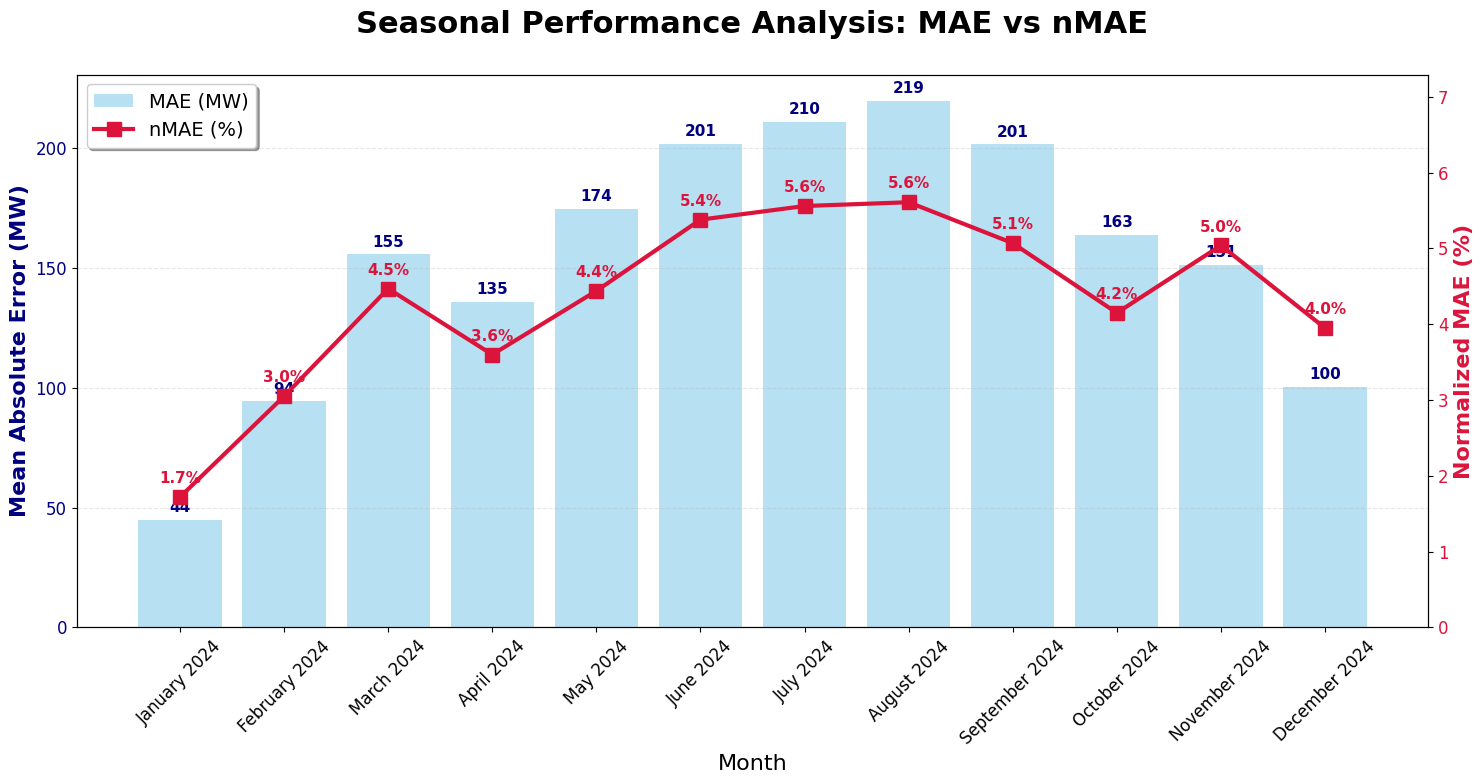

In [ ]:
import matplotlib.pyplot as plt

# --- CONFIGURACIÓN DEL PLOT CON DOBLE EJE ---
fig, ax1 = plt.subplots(figsize=(15, 8))

# 1. Eje Izquierdo: MAE (Barras)
color_mae = 'skyblue'
bars = ax1.bar(df_mensual['Month'], df_mensual['MAE (MW)'], color=color_mae, alpha=0.6, label='MAE (MW)')
ax1.set_ylabel('Mean Absolute Error (MW)', fontsize=16, fontweight='bold', color='navy')
ax1.set_xlabel('Month', fontsize=16)
ax1.tick_params(axis='y', labelcolor='navy', labelsize=12)
ax1.set_xticklabels(df_mensual['Month'], rotation=45, fontsize=12)

# 2. Eje Derecho: nMAE (Línea)
ax2 = ax1.twinx()  # Crea el segundo eje que comparte el eje X
color_nmae = 'crimson'
ax2.plot(df_mensual['Month'], df_mensual['nMAE (%)'], color=color_nmae, marker='s', linewidth=3, markersize=10, label='nMAE (%)')
ax2.set_ylabel('Normalized MAE (%)', fontsize=16, fontweight='bold', color=color_nmae)
ax2.tick_params(axis='y', labelcolor=color_nmae, labelsize=12)
ax2.set_ylim(0, df_mensual['nMAE (%)'].max() * 1.3) # Damos margen arriba

# --- FINAL APPEREANCE ---
plt.title("Seasonal Performance Analysis: MAE vs nMAE", fontsize=22, pad=30, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir etiquetas de valor encima de las barras (MAE)
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{int(yval)}', ha='center', va='bottom', fontsize=11, fontweight='bold', color='navy')

# Añadir etiquetas de valor en la línea (nMAE)
for i, txt in enumerate(df_mensual['nMAE (%)']):
    ax2.annotate(f'{txt:.1f}%', (df_mensual['Month'][i], df_mensual['nMAE (%)'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=11, color=color_nmae, fontweight='bold')

# Unir leyendas de ambos ejes en una sola
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=14, shadow=True)

fig.tight_layout()
plt.show()

***VARIABLE IMPORTANCE***

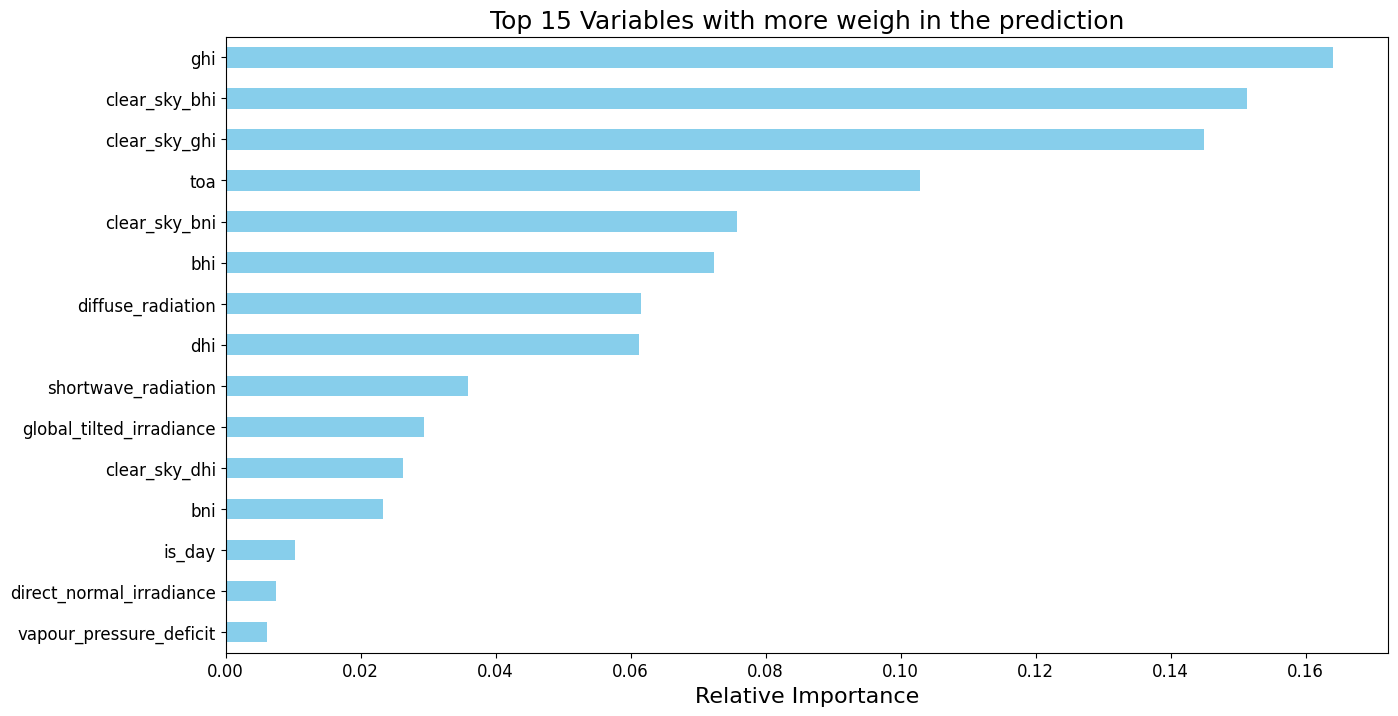

TOP 15 VARIABLES ACTUALLY KEY:
--------------------------------------------------
 1. ghi                            |  16.4035%
 2. clear_sky_bhi                  |  15.1371%
 3. clear_sky_ghi                  |  14.4928%
 4. toa                            |  10.2885%
 5. clear_sky_bni                  |   7.5842%
 6. bhi                            |   7.2424%
 7. diffuse_radiation              |   6.1481%
 8. dhi                            |   6.1217%
 9. shortwave_radiation            |   3.5903%
10. global_tilted_irradiance       |   2.9414%
11. clear_sky_dhi                  |   2.6254%
12. bni                            |   2.3307%
13. is_day                         |   1.0302%
14. direct_normal_irradiance       |   0.7540%
15. vapour_pressure_deficit        |   0.6161%
--------------------------------------------------
The top 15 variables explain 97.31% of the decisions of the model.


In [ ]:
# Sacar importancia de variables
importances = model_rf.feature_importances_
feat_importances = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(15, 8))
feat_importances.tail(15).plot(kind='barh', color='skyblue')
plt.title("Top 15 Variables with more weigh in the prediction")
plt.xlabel("Relative Importance")
plt.show()


# Aseguramos que el orden sea de mayor a menor
feat_importances_sorted = pd.Series(model_rf.feature_importances_, index=features).sort_values(ascending=False)

print("TOP 15 VARIABLES ACTUALLY KEY:")
print("-" * 50)
for i, (nombre, valor) in enumerate(feat_importances_sorted.head(15).items(), 1):
    porcentaje = valor * 100
    print(f"{i:2d}. {nombre:<30} | {porcentaje:>8.4f}%")
print("-" * 50)

# Verificación extra: ¿Cuánto suman las 15 primeras?
suma_top = feat_importances_sorted.head(15).sum() * 100
print(f"The top 15 variables explain {suma_top:.2f}% of the decisions of the model.")

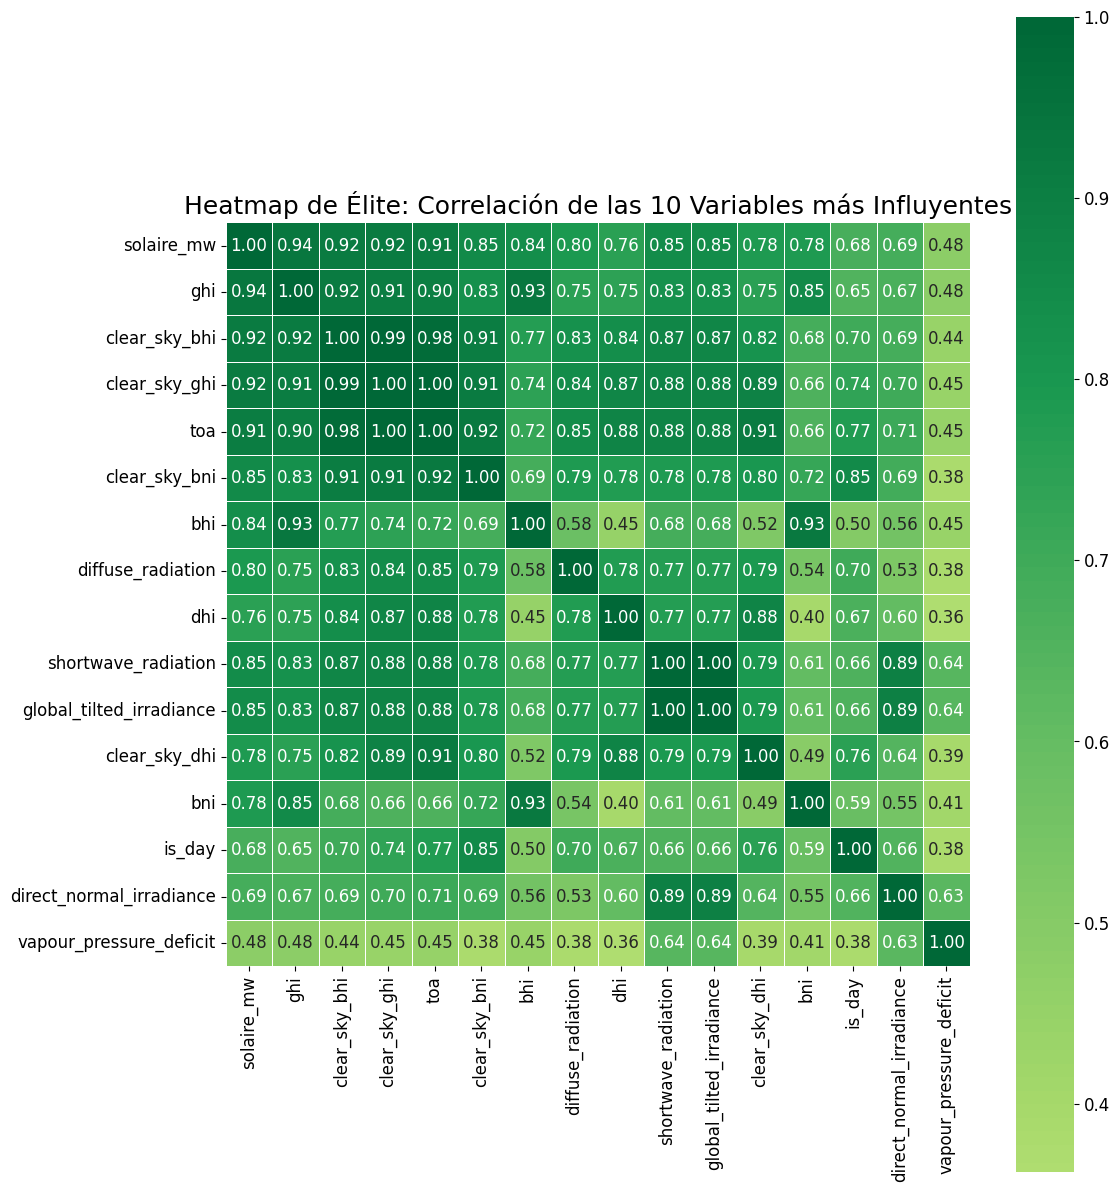

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Obtenemos los nombres de las 10 mejores variables del modelo automáticamente
top_10_features = list(feat_importances_sorted.head(15).index)

# 2. Añadimos nuestro target a la lista para ver la relación
cols_finales = [target] + top_10_features

# 3. Creamos el Heatmap
plt.figure(figsize=(12, 15))
correlation_matrix = df_ultra_final[cols_finales].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='RdYlGn',
    center=0,
    fmt=".2f",
    linewidths=0.5,
    square=True # Lo hace más estético (cuadrado)
)

plt.title("Heatmap de Élite: Correlación de las 10 Variables más Influyentes")
plt.show()

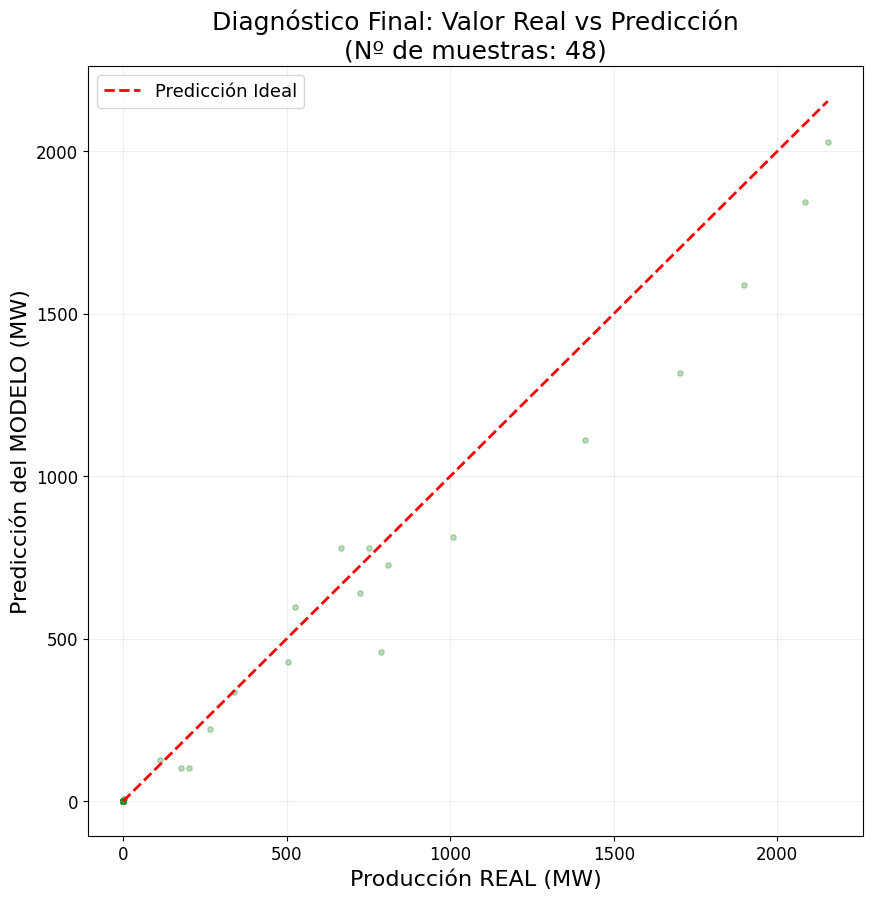

In [ ]:
# 1. Aseguramos que X_test e y_test sean los del periodo que queremos ver ahora
# (Si quieres ver el scatter del último periodo definido en test_df)
X_scatter = test_df[features]
y_real_scatter = test_df[target]

# 2. Generamos la predicción fresca para este set exacto
y_pred_scatter = model_rf.predict(X_scatter)

# 3. Ahora sí, ploteamos sin miedo al ValueError
plt.figure(figsize=(10, 10))

# El scatter con los datos sincronizados
plt.scatter(y_real_scatter, y_pred_scatter, alpha=0.3, color='forestgreen', s=15)

# Dibujar la línea ideal
max_val = max(y_real_scatter.max(), y_pred_scatter.max())
min_val = min(y_real_scatter.min(), y_pred_scatter.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Predicción Ideal")

plt.title(f"Diagnóstico Final: Valor Real vs Predicción\n(Nº de muestras: {len(y_real_scatter)})")
plt.xlabel("Producción REAL (MW)")
plt.ylabel("Predicción del MODELO (MW)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

📋 PRECISION ANALYSIS BY HOURLY FORMAT:
------------------------------------------------------------
Hora   | MAE (MW)   | Error Max  | Prod. Media 
------------------------------------------------------------
08:00  | 57.06      | 100.65     | 158.00      
09:00  | 165.48     | 329.25     | 562.50      
10:00  | 185.58     | 299.99     | 968.75      
11:00  | 210.25     | 310.31     | 1283.00     
12:00  | 76.06      | 124.18     | 1452.25     
13:00  | 161.25     | 240.83     | 1446.75     
14:00  | 233.77     | 383.92     | 1214.00     
15:00  | 138.14     | 198.13     | 757.75      
16:00  | 58.75      | 74.56      | 221.00      
17:00  | 3.46       | 4.01       | 2.75        
------------------------------------------------------------


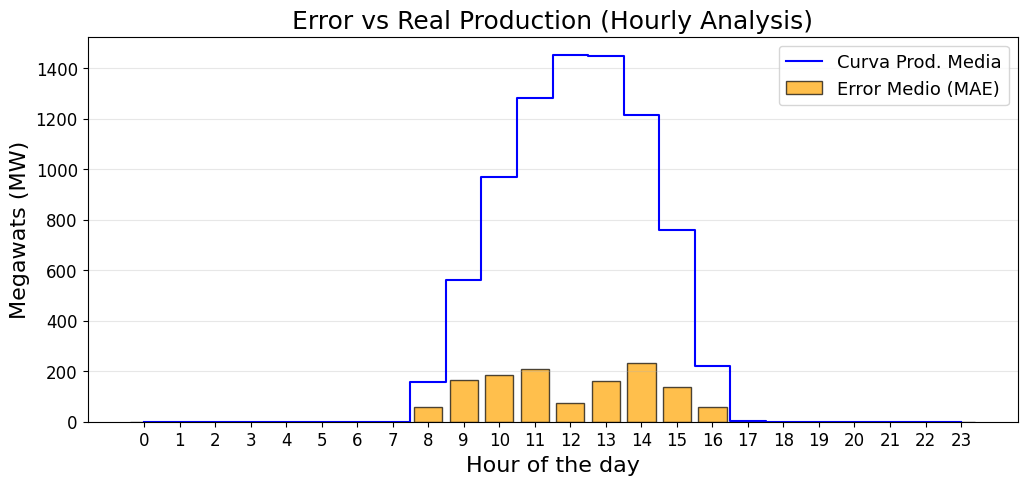

In [ ]:
# 1. Sincronizamos predicciones y extraemos la hora
y_pred_fresco = model_rf.predict(test_df[features]) # 1. Genera las predicciones
test_df['pred'] = y_pred_fresco                     # 2. Las guarda en una columna
test_df['error_abs'] = (test_df[target] - test_df['pred']).abs() # 3. Calcula la diferencia (error)
test_df['hour'] = test_df['datetime'].dt.hour       # 4. Extrae la hora (0-23)


# 2. Calculamos el error promedio (MAE) y el error máximo por hora
analisis_horas = test_df.groupby('hour').agg(
    MAE_Hora=('error_abs', 'mean'),        # Error promedio de esa hora
    Max_Error_Hora=('error_abs', 'max'),   # El peor error registrado a esa hora
    Produccion_Media=('solaire_mw', 'mean') # Cuánta energía hay de media
)

# 3. Imprimimos el reporte textual
print("📋 PRECISION ANALYSIS BY HOURLY FORMAT:")
print("-" * 60)
print(f"{'Hora':<6} | {'MAE (MW)':<10} | {'Error Max':<10} | {'Prod. Media':<12}")
print("-" * 60)

for hora, fila in analisis_horas.iterrows():
    # Solo imprimimos horas con producción significativa (luz de día)
    if fila['Produccion_Media'] > 1:
        print(f"{int(hora):02d}:00  | {fila['MAE_Hora']:<10.2f} | {fila['Max_Error_Hora']:<10.2f} | {fila['Produccion_Media']:<12.2f}")

print("-" * 60)

# 4. El Gráfico (Perfil de Error)
plt.figure(figsize=(12, 5))
plt.bar(analisis_horas.index, analisis_horas['MAE_Hora'], color='orange', edgecolor='black', alpha=0.7, label='Error Medio (MAE)')
plt.step(analisis_horas.index, analisis_horas['Produccion_Media'], where='mid', color='blue', label='Curva Prod. Media')

plt.title('Error vs Real Production (Hourly Analysis)')
plt.ylabel('Megawats (MW)')
plt.xlabel('Hour of the day')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
# Filtramos solo las horas donde hay sol (según tu columna is_day)
df_diurno = test_df[test_df['is_day'] == 1].copy()

mae_diurno = df_diurno['error_abs'].mean()
nmae_diurno = (mae_diurno / df_diurno[target].max()) * 100

print(f" MAE Daylight (Only sun hours): {mae_diurno:.2f} MW")
print(f" nMAE Daylight: {nmae_diurno:.2f}%")

 MAE Daylight (Only sun hours): 128.98 MW
 nMAE Daylight: 5.99%
